Use fixed eps
eps = 0.08164965809277261, n = 150
===== MUFC training =====


100%|██████████| 10/10 [00:00<00:00, 496.68it/s]


mufc time used: 0.18628263473510742 s
Final Cluster Centroids: [[ 1.00659976 -0.07278643  0.95470169  0.95225747]
 [-1.01369994  0.85322883 -1.30786541 -1.25342559]
 [-0.14754547 -0.86431223  0.26732088  0.20463268]]


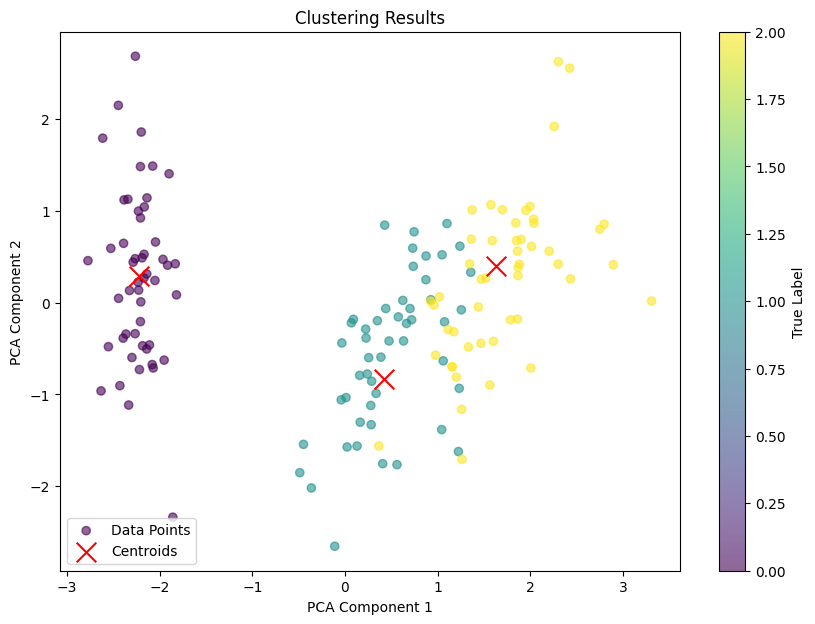

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mufc_fun import federated_clustering_simple

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Normalize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Manually split the data into chunks for each client
num_clients = 10
dataset_chunks = np.array_split(data, num_clients)

# Prepare the dataset dictionary
dataset = {
    'full_data': data,  # Full dataset for reference
}

# Add each client's data to the dataset dictionary
for i in range(num_clients):
    dataset[f'client_{i}'] = dataset_chunks[i]

# Run federated clustering on the prepared dataset
results = federated_clustering_simple(
    dataset=dataset,
    num_clusters=3,  # Number of clusters
    num_clients=num_clients,  # Number of clients
    split='iid',  # This parameter is kept for consistency, but it's not used in this simplified version
    k_prime=3,  # Set this according to your needs
    max_iters=10  # Number of iterations for KMeans
)

# Output the final cluster centroids
print("Final Cluster Centroids:", results["final_clusters"])

# Perform PCA to reduce dimensionality for plotting
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
centroids_2d = pca.transform(results["final_clusters"])

# Plot the data points and cluster centroids
plt.figure(figsize=(10, 7))

# Plot data points
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=target, cmap='viridis', marker='o', alpha=0.6, label='Data Points')

# Plot cluster centroids
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.title('Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.colorbar(scatter, label='True Label')
plt.show()
